In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [5]:
df.isna().sum()

,0
Vehicle Class,0
Coverage,0
Renew Offer Type,0
EmploymentStatus,0
Marital Status,0
Education,0
Number of Policies,0
Monthly Premium Auto,0
Total Claim Amount,0
Income,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

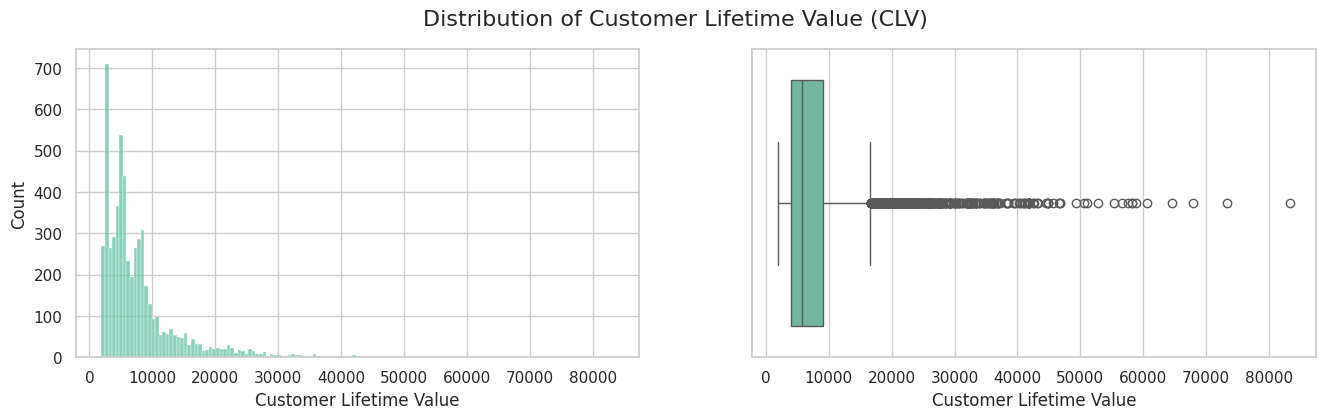

In [10]:
sns.set_theme(style='whitegrid', palette='Set2')
fig = plt.figure(figsize=(16,4))

fig.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

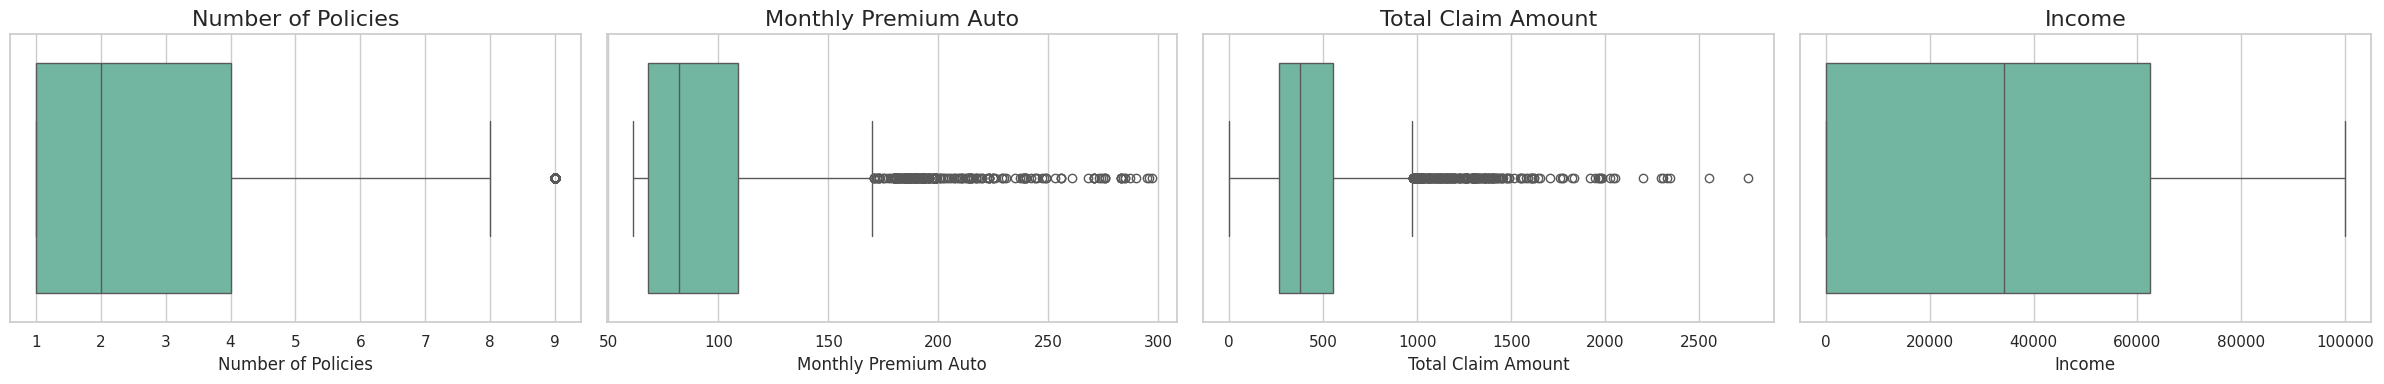

In [12]:
numerical_cols = list(df.describe().columns[:-1])

plt.figure(figsize=(24,4))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(1,4,num_subplot)
    sns.boxplot(data=df, x=i)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

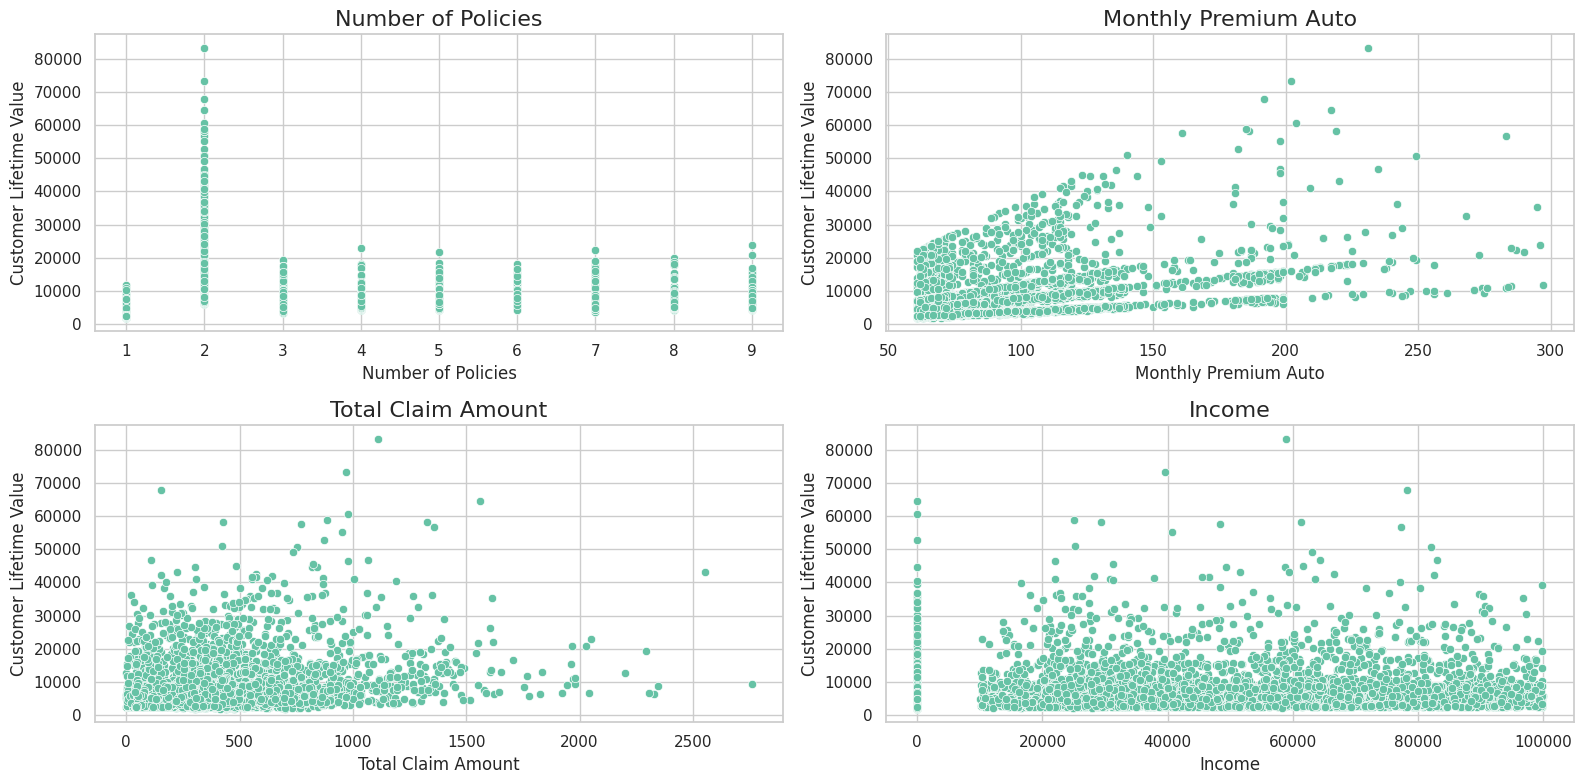

In [13]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

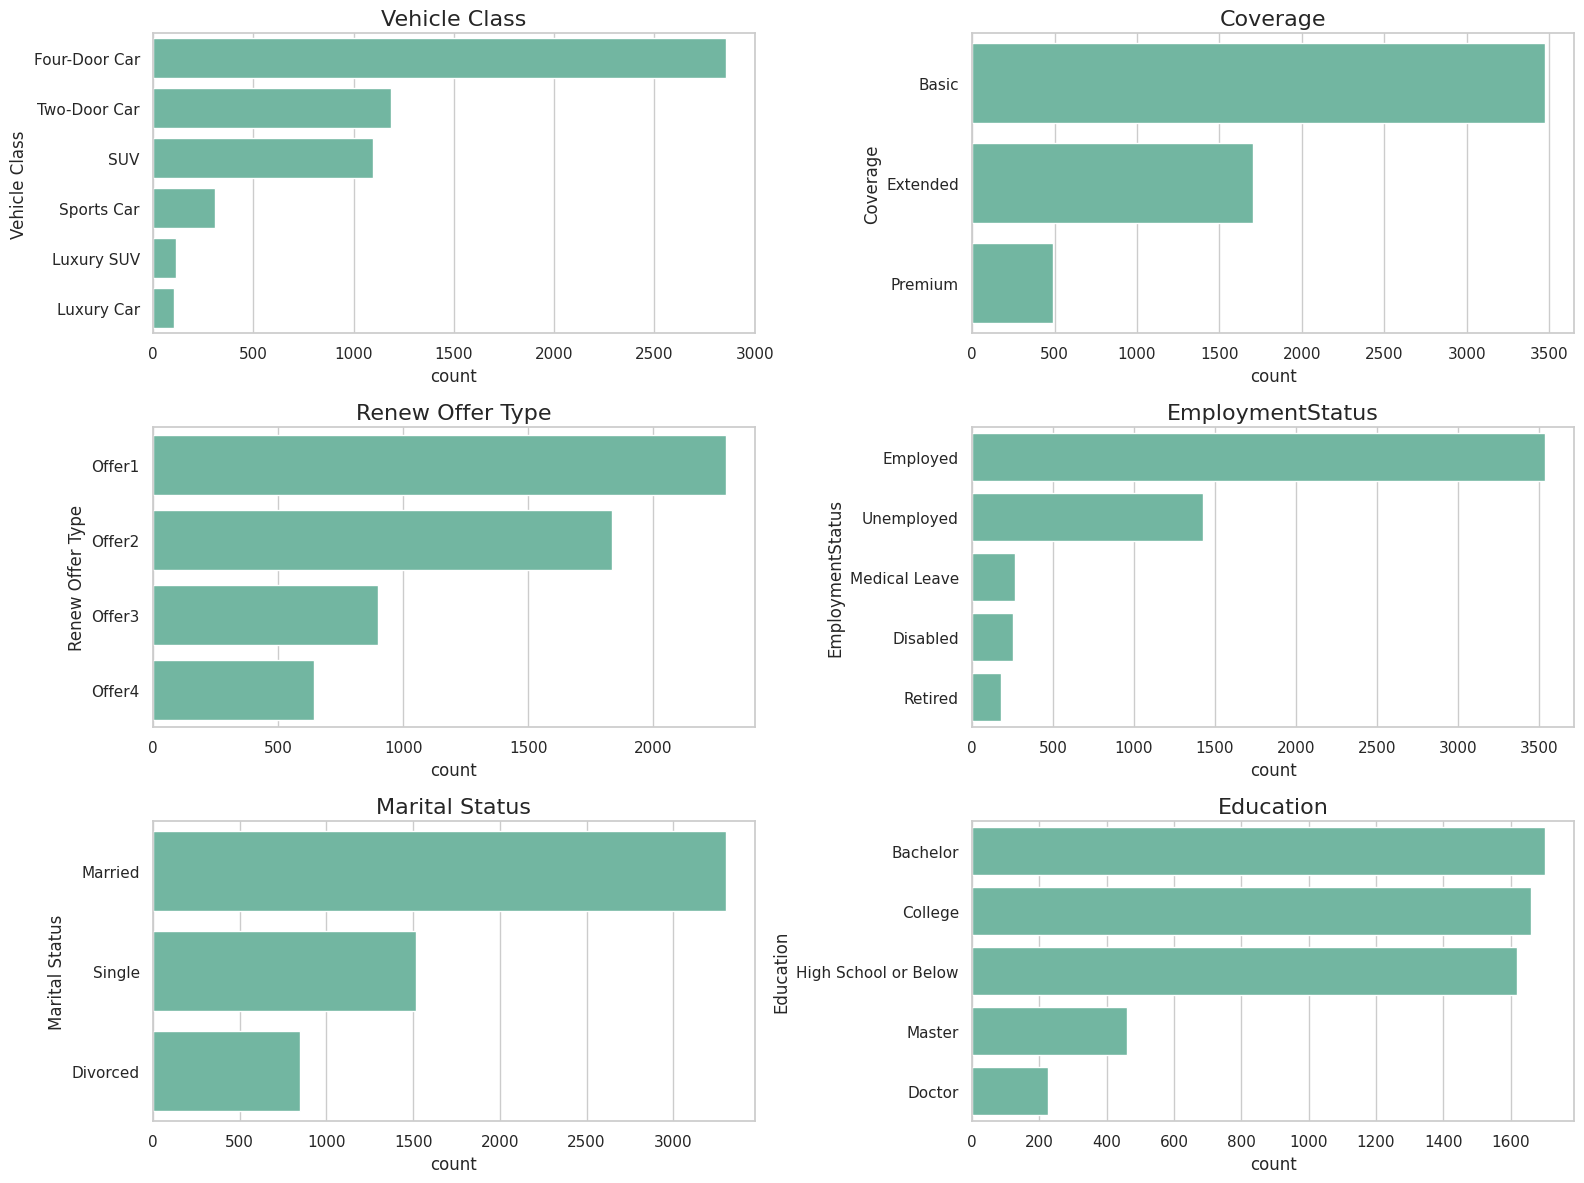

In [15]:
categorical_cols = list(df.describe(include='O').columns)

plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.countplot(data=df, y=i, order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

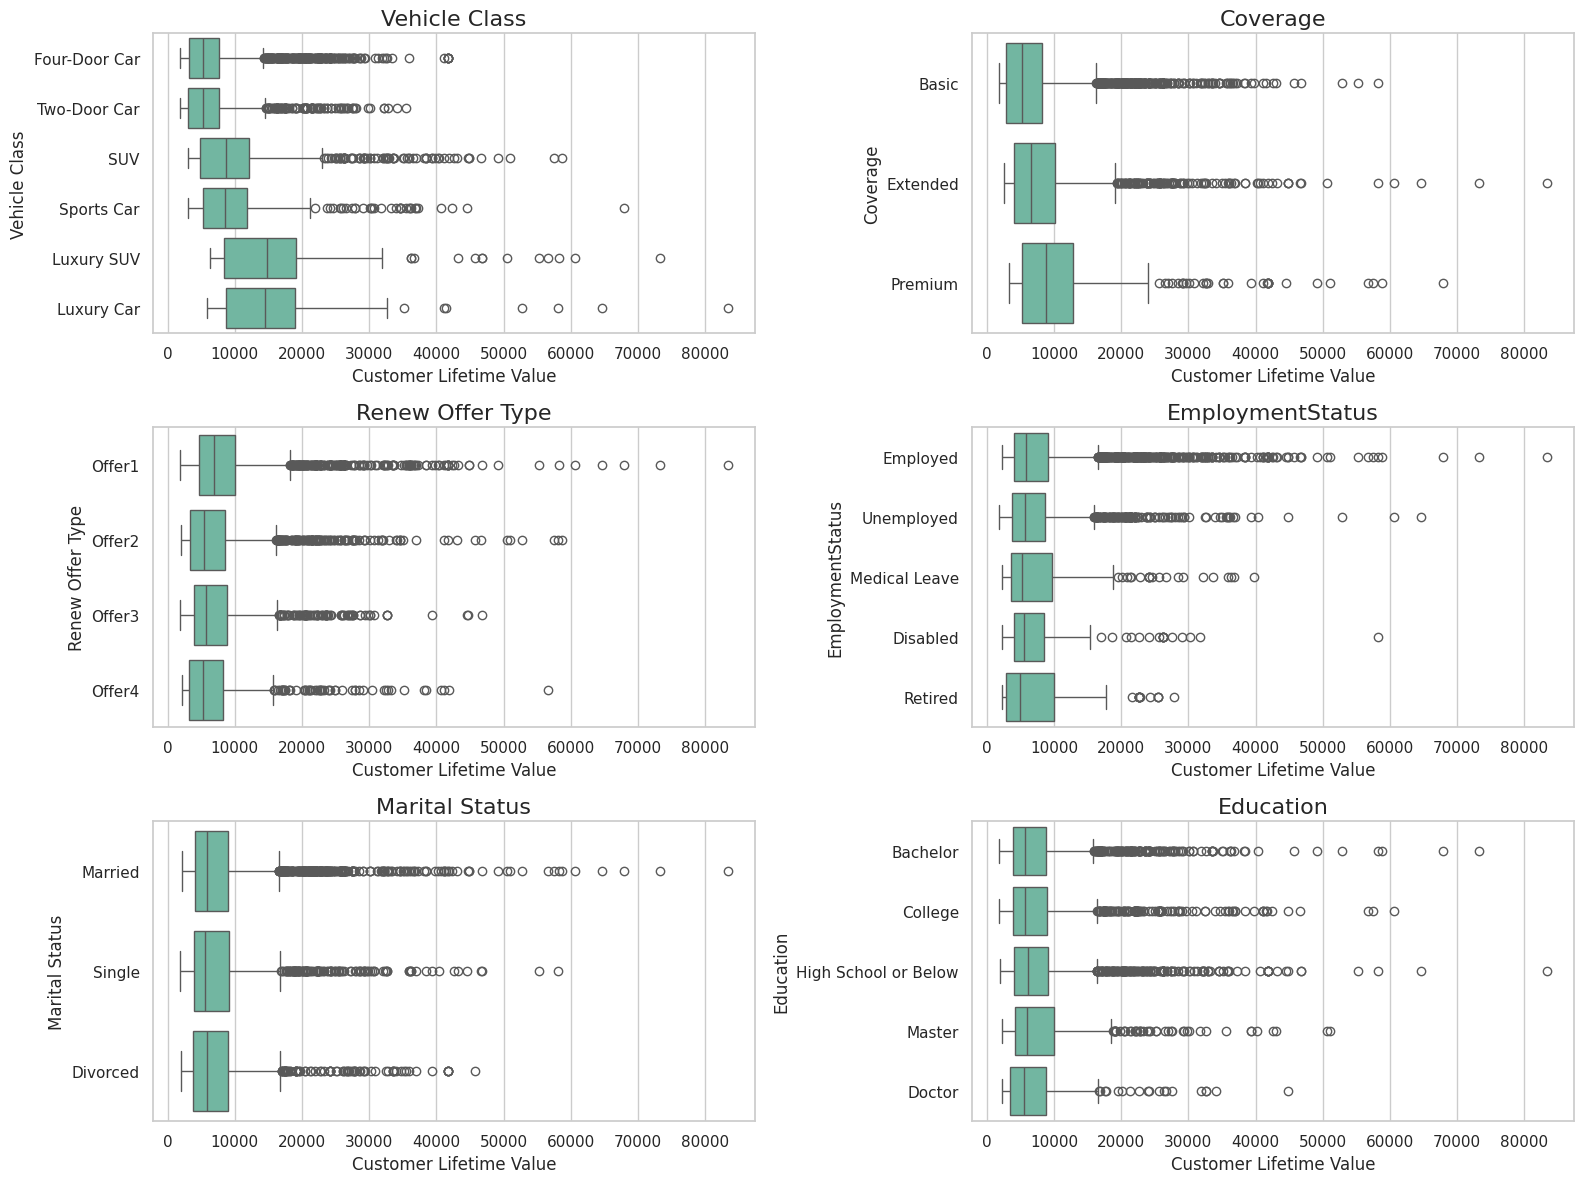

In [16]:
plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

In [19]:
df[df.duplicated()].sort_values('Customer Lifetime Value').head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2763,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755


In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(5051, 11)

In [22]:
df['Number of Policies'].describe()

,Number of Policies
count,5051.000000
mean,2.992081
std,2.386500
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9.000000


In [25]:
df['Number of Policies'].unique()

array([2., 6., 1., 8., 5., 3., 7., 4., 9.])

In [26]:
len(df[df['Number of Policies'] > 8.5])

228

In [27]:
df['Monthly Premium Auto'].describe()

,Monthly Premium Auto
count,5051.000000
mean,92.911107
std,34.335010
min,61.000000
25%,68.000000
50%,82.000000
75%,109.000000
max,297.000000


In [28]:
len(df[df['Monthly Premium Auto'] > 170.5])

252

In [29]:
df['Total Claim Amount'].describe()

,Total Claim Amount
count,5051.000000
mean,429.798954
std,293.129102
min,0.423310
25%,251.776304
50%,374.400000
75%,548.123122
max,2759.794354


In [30]:
len(df[df['Total Claim Amount'] > 992.64])

217

In [31]:
df['Customer Lifetime Value'].describe()

,Customer Lifetime Value
count,5051.000000
mean,8059.483178
std,6989.189674
min,1898.007675
25%,3964.441004
50%,5837.528088
75%,9028.564632
max,83325.381190


In [33]:

len(df[df['Customer Lifetime Value'] > 16624.75])

449

In [34]:
outlier = df[(df['Monthly Premium Auto'] > 224.42) | (df['Customer Lifetime Value'] > 16624.75) | (df['Total Claim Amount'] > 1777)]
len(outlier)

478

In [35]:
df = df.drop(index= outlier.index)

In [36]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [37]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000
mean,3.075661,89.653838,412.444396,37668.661491,6304.594968
std,2.467542,28.491511,258.920435,30669.875939,3316.371350
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,250.423844,0.000000,3694.148760
50%,2.000000,79.000000,368.963633,34244.000000,5479.555081
75%,4.000000,106.000000,537.600000,62291.000000,8139.001346
max,9.000000,223.000000,1654.202174,99934.000000,16589.712370


In [38]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0)

In [48]:

col_transform = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status','Coverage', 'Education'])

], remainder='passthrough')

col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status',
                                  'Coverage', 'Education'])])

In [49]:
robust = RobustScaler()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [51]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)
gbr = GradientBoostingRegressor(random_state= 0)

model = [lr, knn, dt, rf, ada, xgb, gbr]

In [52]:
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Evaluation Metrics yang digunakan
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

for i in model:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

In [54]:
cvresult = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2795.445,187.392,-2092.848,112.533,-0.381,0.007
1,KNN,-2806.195,173.711,-1942.208,77.908,-0.358,0.013
2,Decision Tree,-1285.780,155.724,-464.259,58.729,-0.057,0.006
3,Random Forest,-939.879,113.554,-374.524,40.436,-0.045,0.003
4,AdaBoost,-1385.840,80.156,-988.713,65.636,-0.147,0.008
5,XGBoost,-1006.905,135.807,-462.165,36.967,-0.068,0.001
6,Gradient Boost,-919.764,134.673,-402.923,38.030,-0.052,0.004


In [59]:
test_models = [rf, gbr]

_rmse =[]
_mae =[]
_mape =[]


for i in test_models:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])


    pipe_model.fit(X_train, y_train)
    yPred = pipe_model.predict(X_test)


    _rmse.append(np.sqrt(mean_squared_error(y_test, yPred)))
    _mae.append(mean_absolute_error(y_test, yPred))
    _mape.append(mean_absolute_percentage_error(y_test, yPred))

In [60]:
score_ = pd.DataFrame({
    'RMSE': _rmse,
    'MAE': _mae,
    'MAPE': _mape},
    index=['rf', 'gbr']).round(3)

score_

,RMSE,MAE,MAPE
rf,970.255,378.064,0.046
gbr,906.381,380.254,0.049


In [64]:
import pickle

pickle.dump(pipe_model, open('model_gradientboost_CLV.pickle', 'wb'))